<a href="https://colab.research.google.com/github/Trisinus123/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Trisinus Gulo

Kelas : 3C

Absen : 28

Nim : 2141720035

Import Library data

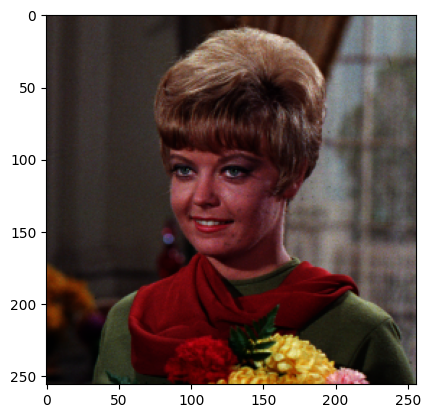

In [141]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

#TUGAS PRAKTIKUM

1. Buat Gamma Correction

    Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
    Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
    meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
    dengan gamma correction sesuai rumus yang telah diberikan.


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


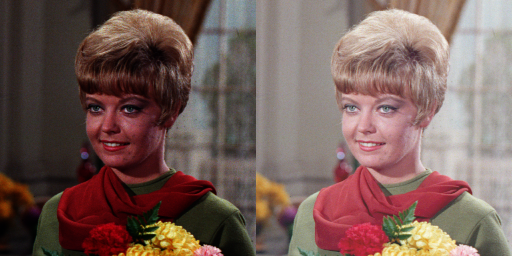

In [142]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


2. Buat Simulasi Image Depth

   Membaca citra masukan dan memberi nilai kedalaman citra,


 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 1


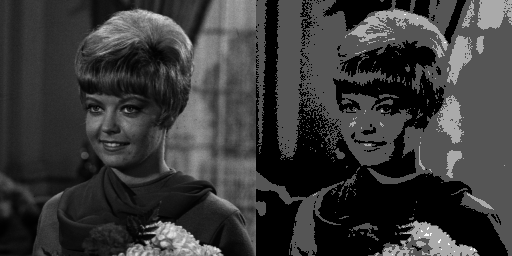

In [143]:
original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2
level = 255 / (pow(2, bit)-1)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoisin

In [217]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/noises/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

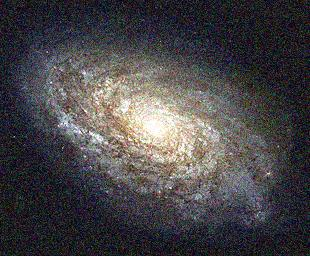

In [218]:
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan
anda:

In [219]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.337339711337073


In [240]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/noises/noises/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/noises/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

Nilai PSNR adalah 27.8965397579001 (dB)


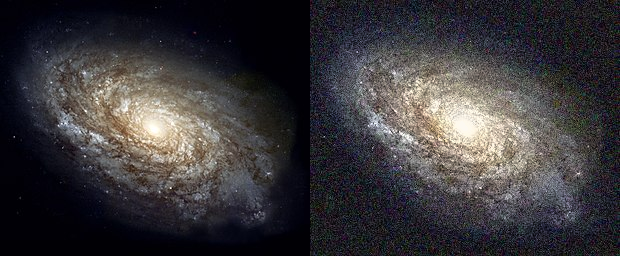

In [227]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.52395416678398 (dB)


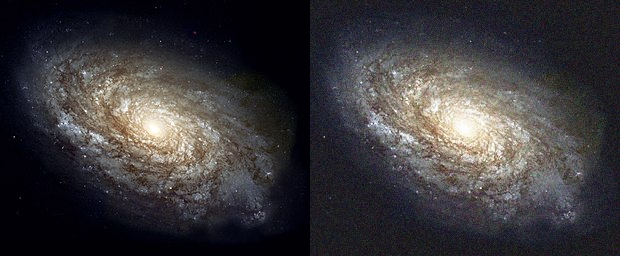

In [241]:
#5
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


Nilai PSNR adalah 27.516975757393784 (dB)


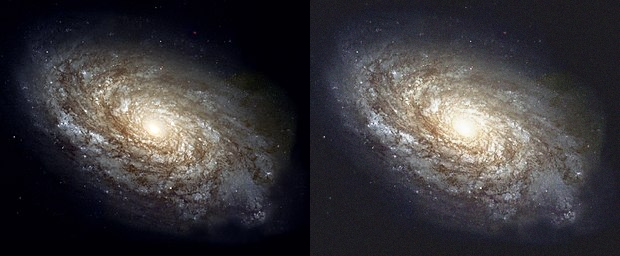

In [242]:
#30
dst = cv_img[0]
noise_number = 30
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


Nilai PSNR adalah 27.501576226438125 (dB)


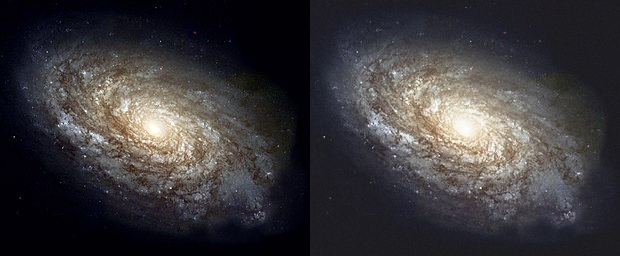

In [243]:
#80
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.507794187914488 (dB)


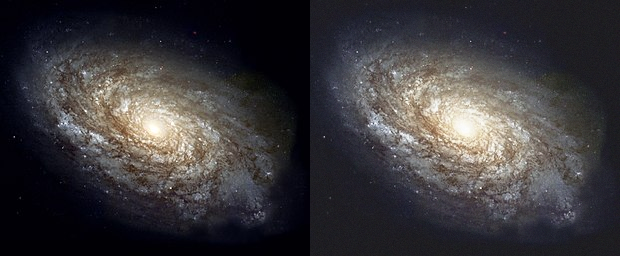

In [244]:
#100
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

4. Buat image masking untuk image berikut.

Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

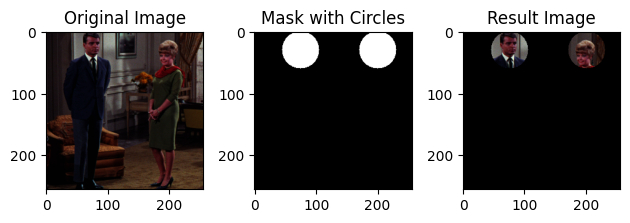

In [192]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Images/couple.jpg')

mask = np.zeros_like(img)

center_coordinates1 = (75, 30)
radius1 = 30
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (200, 30)
radius2 = 30
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = cv.bitwise_and(img, mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

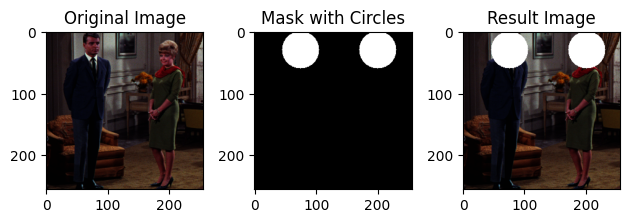

In [191]:
# or

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Images/couple.jpg')

mask = np.zeros_like(img)

center_coordinates1 = (75, 30)
radius1 = 30
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (200, 30)
radius2 = 30
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = img | mask

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

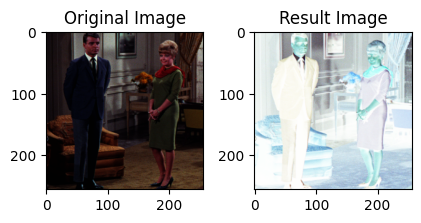

In [194]:
# not

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Images/couple.jpg')

mask = np.zeros_like(img)

center_coordinates1 = (75, 30)
radius1 = 30
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (200, 30)
radius2 = 30
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = ~img

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# plt.subplot(132)
# plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
# plt.title('Mask with Circles')

plt.subplot(132)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

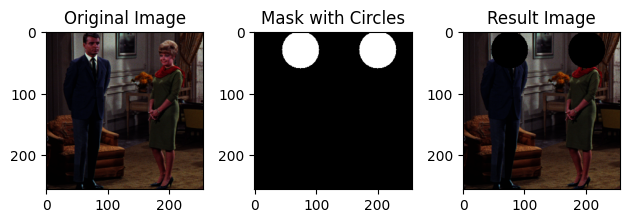

In [196]:
from numpy.ma.core import bitwise_and
# nand

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Images/couple.jpg')

mask = np.zeros_like(img)

center_coordinates1 = (75, 30)
radius1 = 30
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (200, 30)
radius2 = 30
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = bitwise_and(img, ~mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

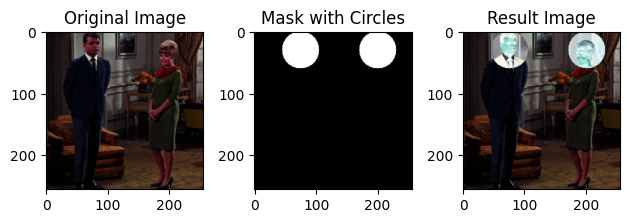

In [197]:
# XOR

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Images/couple.jpg')

mask = np.zeros_like(img)

center_coordinates1 = (75, 30)
radius1 = 30
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (200, 30)
radius2 = 30
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = cv.bitwise_xor(img, mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()



Tugas Kelompok 8

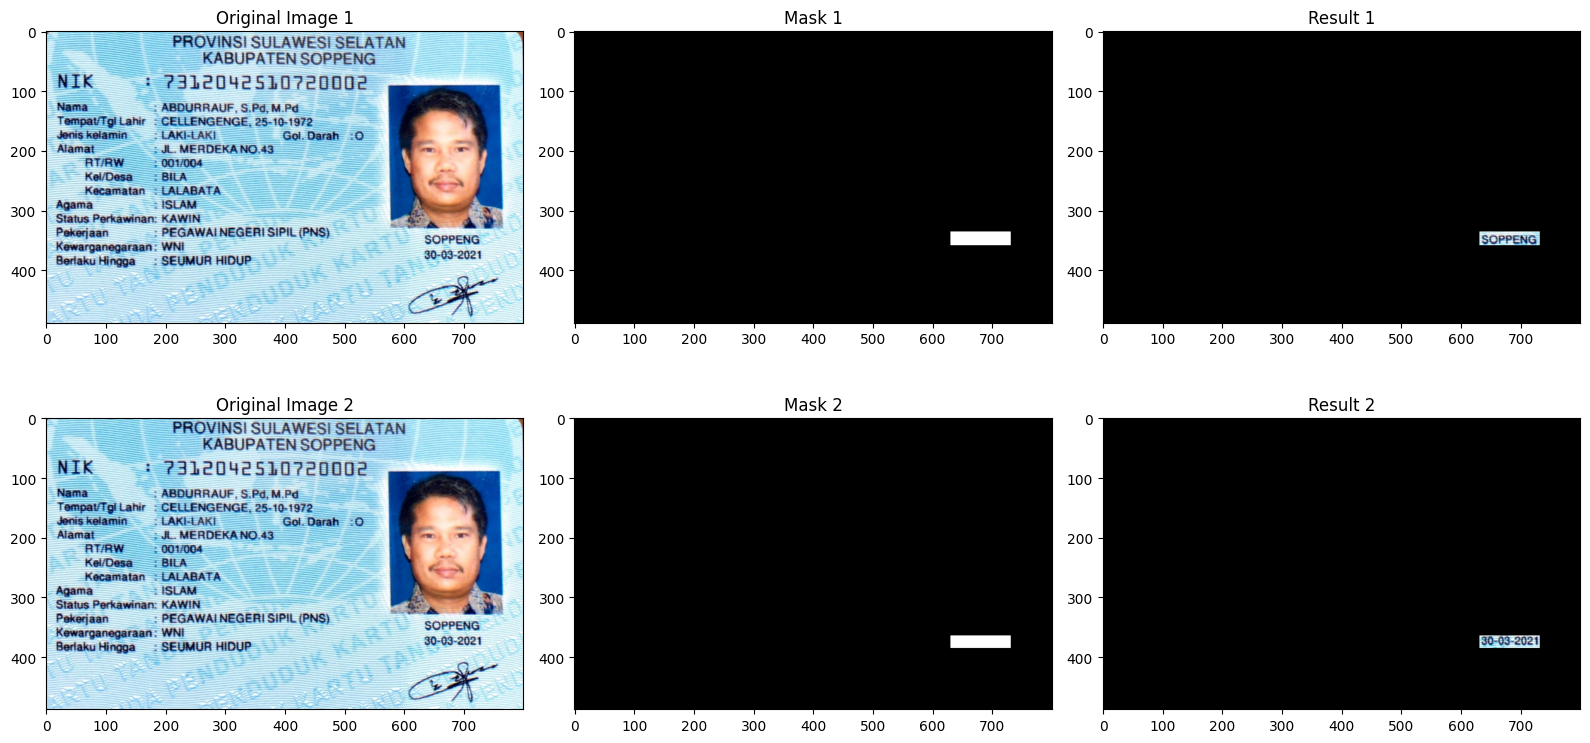

False

In [245]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

plt.figure(figsize=(16, 8))

img = cv.imread('/content/drive/MyDrive/Images/KTP.jpeg')

mask1 = np.zeros_like(img) # membuat mask background hitam dengan array

mask2 = np.zeros_like(img) # membuat mask background hitam dengan array

# Kotak Kabupaten
kabupaten_1 = (630, 335)  # Titik pojok kiri atas
kabupaten_2 = (730, 357)  # Titik pojok kanan bawah

color = (255, 255, 255)  # Warna putih
thickness = -1

cv.rectangle(mask1, kabupaten_1, kabupaten_2, color, thickness)

# Kotak Berlaku Hingga
berlaku_1 = (630, 365)  # Titik pojok kiri atas
berlaku_2 = (730, 385)  # Titik pojok kanan bawah

color = (255, 255, 255)  # Warna putih
thickness = -1

# Menggambar kotak kedua pada mask
cv.rectangle(mask2, berlaku_1, berlaku_2, color, thickness)

result1 = cv.bitwise_and(img, mask1) # menggabungkan image asli dengan mask1

result2 = cv.bitwise_and(img, mask2) # menggabungkan image asli dengan mask2

plt.subplot(231)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image 1')

plt.subplot(232)
plt.imshow(cv.cvtColor(mask1, cv.COLOR_BGR2RGB))
plt.title('Mask 1')

plt.subplot(233)
plt.imshow(cv.cvtColor(result1, cv.COLOR_BGR2RGB))
plt.title('Result 1')

plt.subplot(234)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image 2')

plt.subplot(235)
plt.imshow(cv.cvtColor(mask2, cv.COLOR_BGR2RGB))
plt.title('Mask 2')

plt.subplot(236)
plt.imshow(cv.cvtColor(result2, cv.COLOR_BGR2RGB))
plt.title('Result 2')

plt.tight_layout()
plt.show()


cv.imwrite('/content/drive/MyDrive/PCVK/kabupaten.jpg', result1)
cv.imwrite('/content/drive/MyDrive/PCVK/berlaku.jpg', result2)

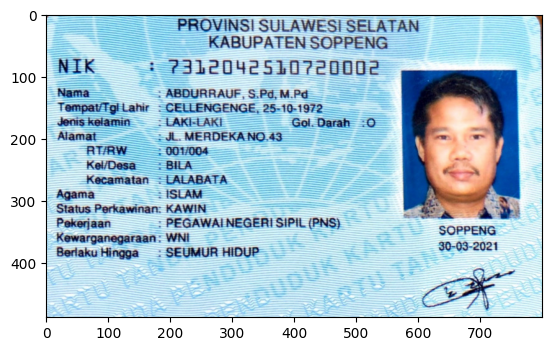

In [247]:
img = cv.imread('/content/drive/MyDrive/Images/KTP.jpeg')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

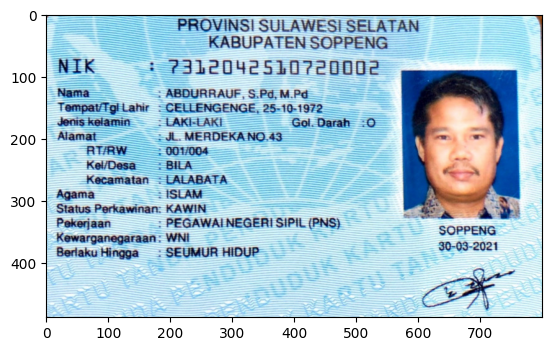

In [248]:
img = cv.imread('/content/drive/MyDrive/Images/KTP.jpeg')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))